# Generating coeval boxes and lightcones

The majority of the functions for generating these two objects are the same, with the exception of the lightcone class having the extra attribute Lightconer (the lightconer object from 21cmFAST, required for plotting of the lightcone) and the plot_lightcone function; and the lightcone having a central redshift and redshift range, as opposed to the single input redshift for the box.  
Here, we demonstrate with a box.

In [1]:
from postEoR import generation as gen
import matplotlib.pyplot as plt
import numpy as np

We can specify the desired redshift (+ redshift range for the cone), the physical dimensions and number of cells, and the overdensity limit for inclusion of cells in halos.

In [29]:
box = gen.generate_box(6, 250, 40, connectivity=1, normalise_halos=False, max_rad=1)

Optimal overdensity cap used is 7.997999999999999
9350
crit dens 5.8160395484597314e-27
min mass of cell before halos 2665558176.974152
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


We can plot colormaps, power spectra, halo mass functions etc. from the object itself.

# Halo mass functions

From the box, we plot its halo mass function. This is plotted alongside the theoretical, generated by the hmf package (Murray et al. 2013).

(10000000000.0, 10000000000000.0)

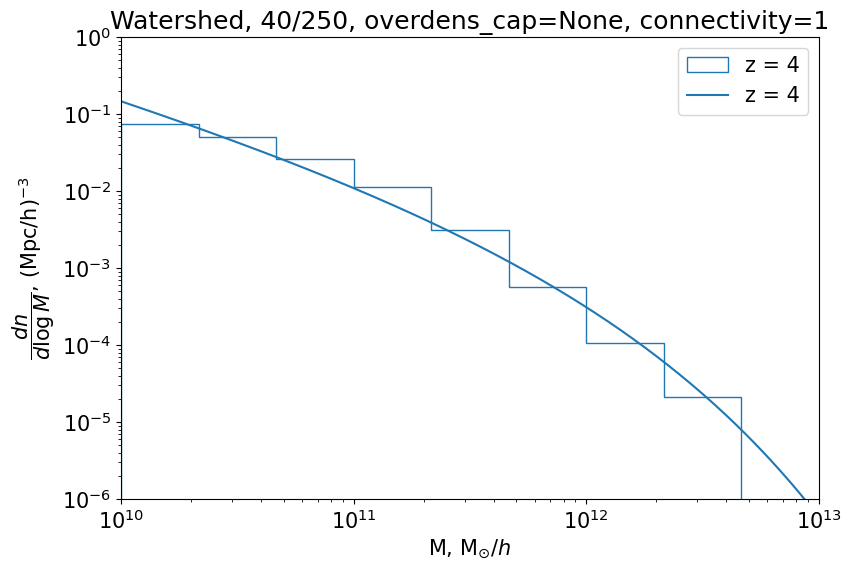

In [9]:
box.gen_hmf(title="Watershed, 40/250, overdens_cap=None, connectivity=1", Mmax=13, Mmin=10, no_bins=10)
plt.ylim(1e-6, 1e-0)
plt.xlim(1e10, 1e13)

Separately, we also can look at the evolution of the HMF with redshift.

30765
crit dens 5.8160395484597314e-27
min mass of cell before halos 2073665313.105524
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
29220
crit dens 5.8160395484597314e-27
min mass of cell before halos 2073671436.8971186
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
23828
crit dens 5.8160395

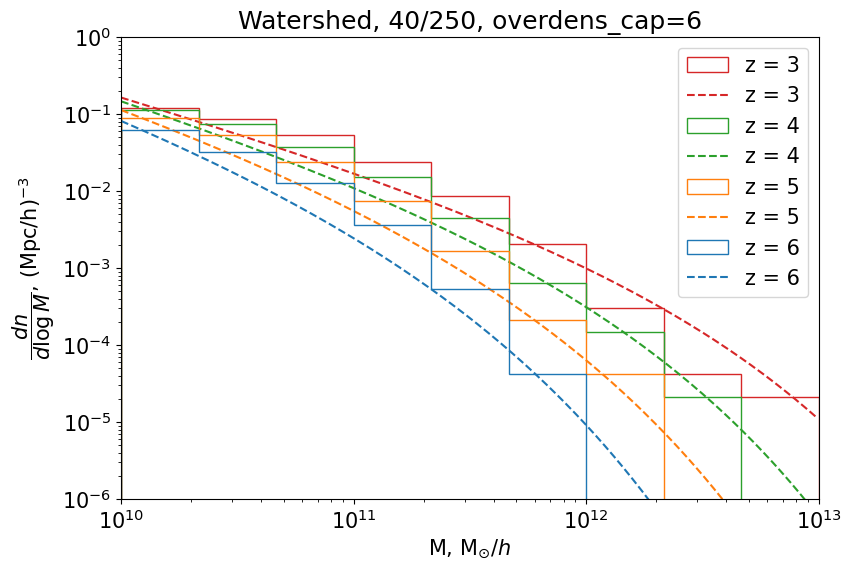

In [22]:
box = gen.generate_box(3, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:red", linestyle="--")
box = gen.generate_box(4, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:green", linestyle="--")
box = gen.generate_box(5, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:orange", linestyle="--")
box = gen.generate_box(6, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:blue", linestyle="--")
plt.ylim(1e-6, 1e-0)
plt.xlim(1e10, 1e13)
plt.show()

# Field slices

Below we plot a slice of the brightness temperature field. We may also do this for the halo field, using "halo" for the field parameter.

<Figure size 1300x600 with 0 Axes>

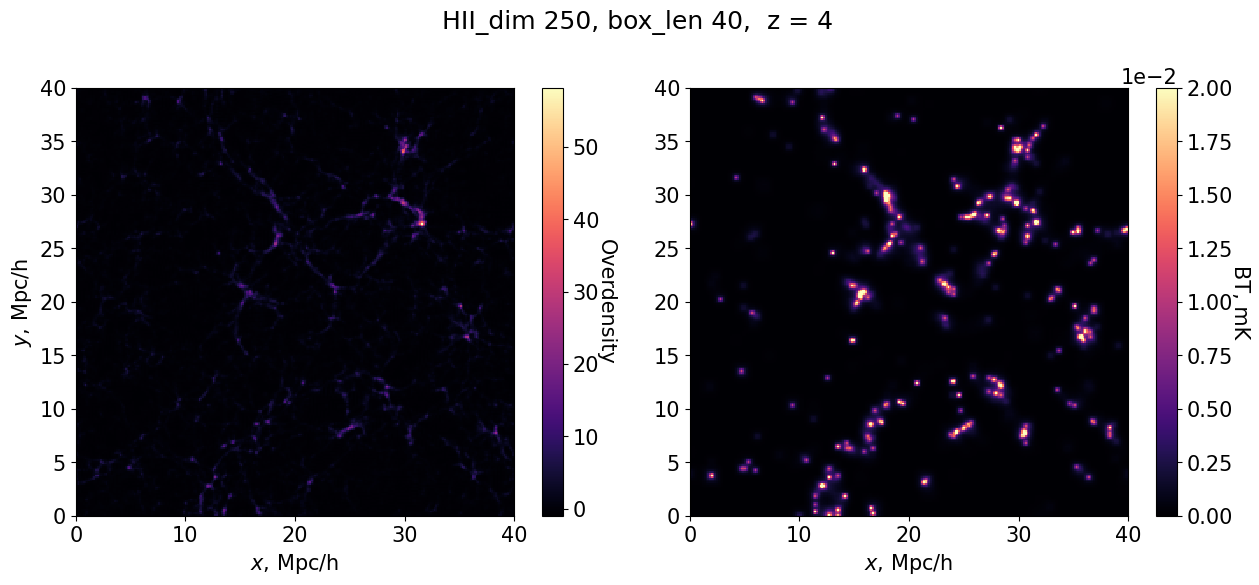

In [12]:
box.plot_slice(field="BT", vmax=0.2e-1)

# Power spectra and bias

The bias may also be calculated, and plot separately using matplotlib.

Generated bins.
Generated bins.
Using input bins
Using input bins


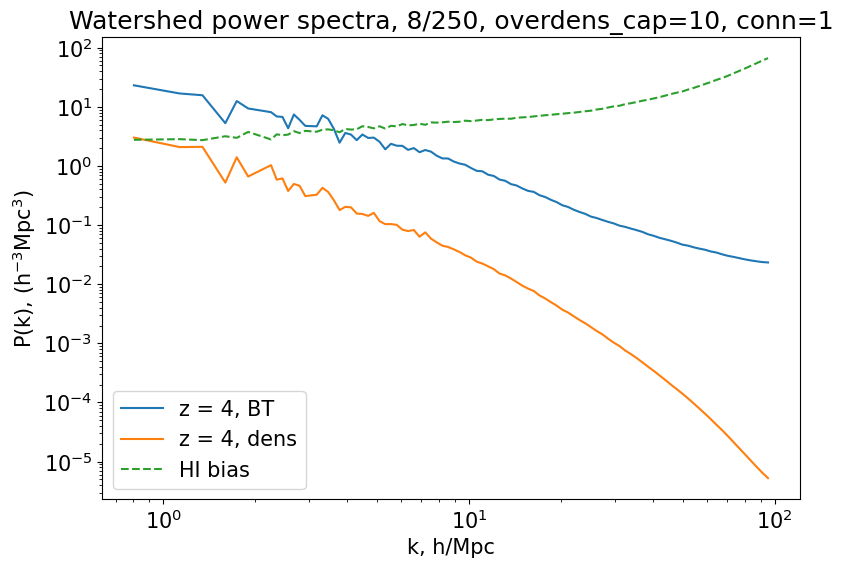

In [19]:
k, PS, err = box.get_PS("BT", color="tab:blue", norm=True)
_, dens_ps, _ = box.get_PS("dens", color="tab:orange", title="Watershed power spectra, 8/250, overdens_cap=10, conn=1")

k, bias = box.get_bias()
plt.plot(k, bias, color="tab:green", linestyle="--", label="HI bias")

plt.yscale("log")
plt.xscale("log")
plt.xlabel("k, h/Mpc")
plt.ylabel("P(k), (h$^{-3}$Mpc$^3$)")
plt.legend()

# Checking density parameter

We calculate the dimensionless HI density parameter $\Omega_{HI}$ below.

In [5]:
print(box.get_omega_HI())

0.0009552801981532449


# Including observational effects

We first generate an example survey, based off of the parameters of the SKA1-low deep survey (SKA red book 2018).

In [22]:
import postEoR.observations as obs
import importlib
importlib.reload(obs)

AA4 = obs.SKA1LOW_AA4(0)

some_survey = obs.Interferometer(AA4, 6, 3, 100, 5000, 0)

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


We now plot the predicted uncertainty from thermal noise of the HI power spectrum of the previously-generated box.

Generated bins.


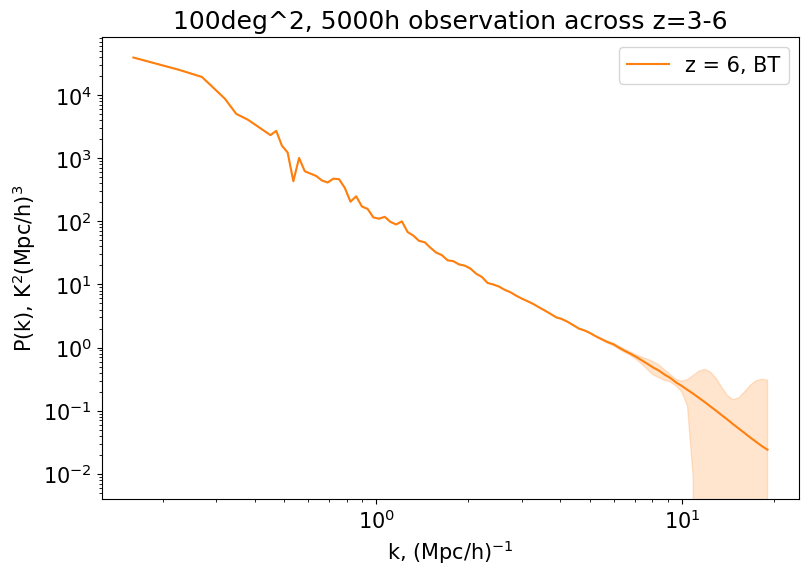

In [30]:
from scipy.interpolate import make_interp_spline

n = np.size(box.density_field)

BT_k, BT_ps, _ = box.get_PS("BT", norm=False, color="tab:orange")
ps, k_perp = some_survey.noise_power_perp(box.z)
#ps /= n
plt.title("100deg^2, 5000h observation across z=3-6")
noise = make_interp_spline(k_perp, ps)
plt.fill_between(BT_k, BT_ps - noise(BT_k), BT_ps + noise(BT_k), alpha=0.2, color="tab:orange")
plt.ylabel("P(k), K$^2$(Mpc/h)$^3$")
plt.legend()